In [24]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read data
df = pd.read_csv('wildfires_with_geocoord.csv', parse_dates=True)

# some data wrangling
df.dropna(subset=['alarm_date', 'cont_date'], inplace=True)
df['start'] = pd.to_datetime(df.alarm_date)
df['end'] = pd.to_datetime(df.cont_date)
df['duration'] = (df['end'] - df['start']).dt.days
df = df[df.duration>0]  # drop mistakes


grouped = df.groupby('year').mean()
grouped.reset_index(inplace=True)
grouped = grouped[['year', 'duration']]
grouped.to_csv('wildfires_grouped_task5.csv', index=False)

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_78645/1088521429.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



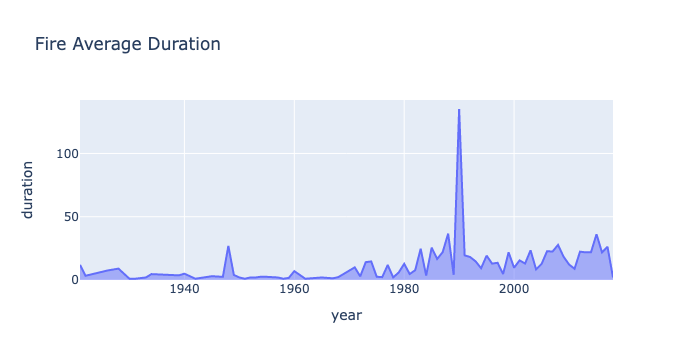

In [25]:
df_5 = pd.read_csv('wildfires_grouped_task5.csv')

fig_6 = px.area(df_5, x="year", y="duration",
             title="Fire Average Duration")
fig_6.show()
